# Instructions

Answer the questions and perform any additional analysis you think will help you understand what's going on in the data. You will be required to present your work, you can use this notebook or create slides based on your analysis. Whatever you’re comfortable with is fine with us.

The section headings below are only a guide and this notebook should be modified as you see fit.

# 1. Data processing

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../Datasets/data.csv")
data.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        194 non-null    object 
 1   Region                         194 non-null    object 
 2   Population                     194 non-null    int64  
 3   Under15                        194 non-null    float64
 4   Over60                         194 non-null    float64
 5   FertilityRate                  183 non-null    float64
 6   LifeExpectancy                 194 non-null    int64  
 7   ChildMortality                 194 non-null    float64
 8   CellularSubscribers            184 non-null    float64
 9   LiteracyRate                   103 non-null    float64
 10  GNI                            162 non-null    float64
 11  PrimarySchoolEnrollmentMale    101 non-null    float64
 12  PrimarySchoolEnrollmentFemale  101 non-null    flo

The above dataset contains 194 rows, with 13 columns, there is alot of missing data, especially in the LiteracyRate, PrimarySchoolEnrollmentMale and PrimaryScoolEnrollmentFemale columns.

# Fixing DataTypes

The dataset has two columns that have datatypes that do not match with the others, the LifeExpectancy and Population columns are integers, while the rest of the numerical columns have data types of float, we need to fix this before moving forward.

In [4]:
data = data.astype({'Population': float})
data = data.astype({'LifeExpectancy': float})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        194 non-null    object 
 1   Region                         194 non-null    object 
 2   Population                     194 non-null    float64
 3   Under15                        194 non-null    float64
 4   Over60                         194 non-null    float64
 5   FertilityRate                  183 non-null    float64
 6   LifeExpectancy                 194 non-null    float64
 7   ChildMortality                 194 non-null    float64
 8   CellularSubscribers            184 non-null    float64
 9   LiteracyRate                   103 non-null    float64
 10  GNI                            162 non-null    float64
 11  PrimarySchoolEnrollmentMale    101 non-null    float64
 12  PrimarySchoolEnrollmentFemale  101 non-null    flo

Now all of the numerical columns have the same data type and can be compared and analysed more easily going foward, next we will need to deal with the missing values.

# Fixing Missing Values

In [5]:
data.isnull().sum()

Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64

We can see from the list above that we have 11 missing values for FertilityRate, 10 for Cellular Subscribers, 91 for LiteracyRate, 32 for GNI, and 93 for both PrimarySchoolEnrollmentMale and PrimarySchoolEnrollmentFemale. We can replace these missing values with the median value of the region since these values are categorized by both country and region. 

In [6]:
data = pd.DataFrame(data.fillna(
    data.groupby('Region')[['FertilityRate','CellularSubscribers',
                            'LiteracyRate','GNI','PrimarySchoolEnrollmentMale',
                            'PrimarySchoolEnrollmentFemale']].transform('median')))
data.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825.0,47.42,3.82,5.40,60.0,98.5,54.26,85.0,1140.0,92.15,91.80
1,Albania,Europe,3162.0,21.33,14.93,1.75,74.0,16.7,96.39,99.2,8820.0,97.70,97.55
2,Algeria,Africa,38482.0,27.42,7.17,2.83,73.0,20.0,98.99,70.6,8310.0,98.20,96.40
3,Andorra,Europe,78.0,15.20,22.86,1.55,82.0,3.2,75.49,99.2,20495.0,78.40,79.40
4,Angola,Africa,20821.0,47.58,3.84,6.10,51.0,163.5,48.38,70.1,5230.0,93.10,78.20


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        194 non-null    object 
 1   Region                         194 non-null    object 
 2   Population                     194 non-null    float64
 3   Under15                        194 non-null    float64
 4   Over60                         194 non-null    float64
 5   FertilityRate                  194 non-null    float64
 6   LifeExpectancy                 194 non-null    float64
 7   ChildMortality                 194 non-null    float64
 8   CellularSubscribers            194 non-null    float64
 9   LiteracyRate                   194 non-null    float64
 10  GNI                            194 non-null    float64
 11  PrimarySchoolEnrollmentMale    194 non-null    float64
 12  PrimarySchoolEnrollmentFemale  194 non-null    flo

Our dataset does not have any missing values now. They have all been replaced by the median (we used median instead of mean so the dataset wont be as affected by outliers) and we grouped them by region, as some regions will have better averages then others. We dont want to skew the average values of the regions because we took the global median for that missing value.

Our data has now been preprocessed, there are no missing values and the numerical values of the dataset have been changed so they are all floats now. Now we can start with our analysis of the dataset.

# Exploratory Data Analysis

# Identify the country with the lowest % of population Under 15 and the one with the highest.

In [8]:
data_under15 = pd.DataFrame(data, columns = ['Country', 'Under15'])
data_under15.sort_values(by=['Under15']).head()

,Country,Under15
85,Japan,13.12
65,Germany,13.17
137,Qatar,13.28
25,Bulgaria,13.53
83,Italy,14.04


In [9]:
data_under15.sort_values(by=['Under15']).tail()

,Country,Under15
0,Afghanistan,47.42
4,Angola,47.58
33,Chad,48.52
180,Uganda,48.54
123,Niger,49.99


Japan has the lowest percent of population under 15 and Niger has the highest percent of population under 15.

# Which region has the highest % of population over 60?

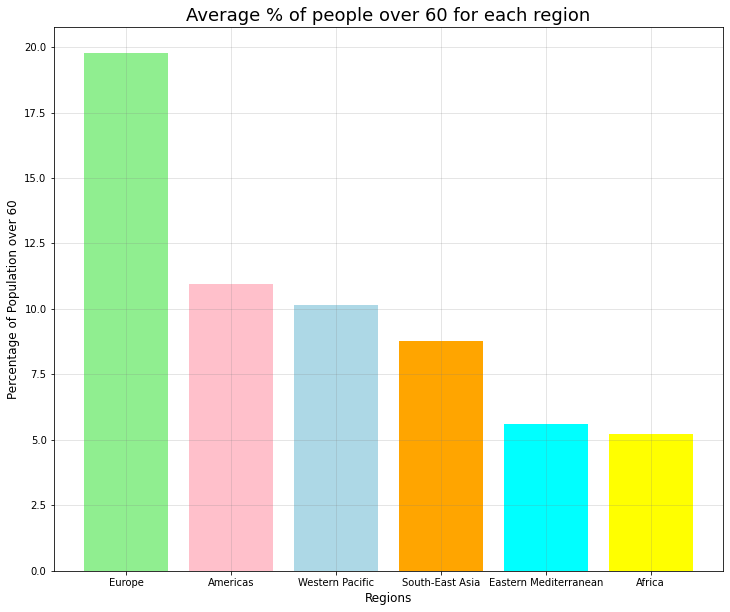

In [10]:
average_over60 = pd.DataFrame(data, columns = ['Region', 'Over60']).groupby('Region')['Over60'].mean().round(2)
average_over60 = average_over60.sort_values(ascending=False)

fig, ax = plt.subplots(figsize =(12, 10))
ax.bar(['Europe', 'Americas', 'Western Pacific', 'South-East Asia', 'Eastern Mediterranean', 'Africa'],
       average_over60,
       color=['lightgreen', 'pink', 'lightblue', 'orange', 'cyan', 'yellow']
      )
ax.grid(b = True, color ='grey',
        linestyle ='-', linewidth = 0.5,
        alpha = 0.4)

plt.title("Average % of people over 60 for each region", size = 18)
plt.ylabel("Percentage of Population over 60", size =12)
plt.xlabel("Regions", size = 12)
plt.show()

As shown in the graph above, Europe is the region with the highest percentage of their population over 60.

# Does fertility decrease as income increases? Are there any countries that don’t seem to follow this relation.

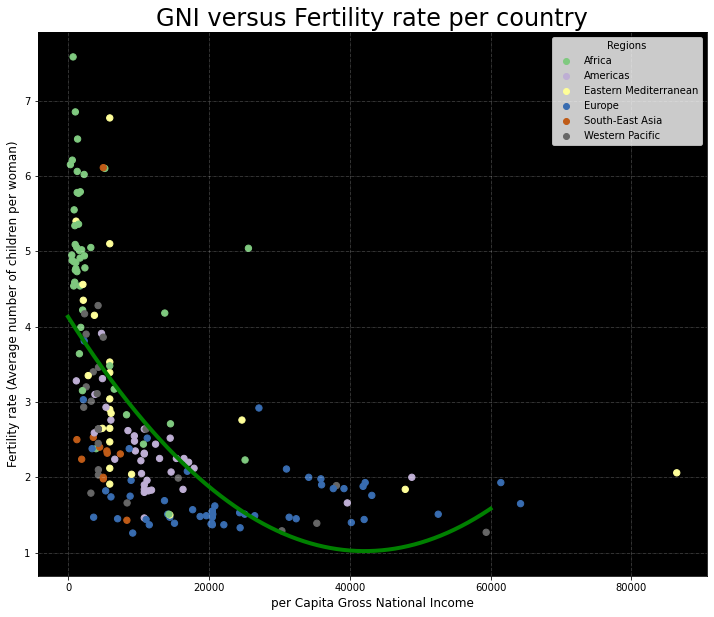

In [11]:
data_income_fertility = pd.DataFrame(data, columns = ['Country', 'Region', 'FertilityRate', 'GNI'])
names = ['Africa', 'Americas', 'Eastern Mediterranean', 'Europe', 'South-East Asia', 'Western Pacific']

fig, ax = plt.subplots(figsize =(12,10))
ax.scatter = plt.scatter(data_income_fertility.GNI, 
                         data_income_fertility.FertilityRate,
                         s=40,
                         c=data_income_fertility.Region.astype("category").cat.codes,
                         cmap= "Accent"
                        )
ax.set_facecolor('Black')

ax.grid(b = True, color ='white',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.4)

linear_model = np.polyfit(data_income_fertility.GNI, data_income_fertility.FertilityRate, 2)
linear_model_fit = np.poly1d(linear_model)
linear_range = np.arange(0,60000)
plt.plot(linear_range, linear_model_fit(linear_range), color='green', linewidth=4)

plt.title("GNI versus Fertility rate per country", size = 24)
plt.xlabel('per Capita Gross National Income', size =12)
plt.ylabel('Fertility rate (Average number of children per woman)', size = 12)

plt.legend(handles=ax.scatter.legend_elements()[0],
           labels = names,
           title="Regions")
plt.show()

In [12]:
data[['FertilityRate','GNI']].corr()

,FertilityRate,GNI
FertilityRate,1.000000,-0.515835
GNI,-0.515835,1.000000


Fertility Rate and per capita gross national income (GNI) have a negative correlation of about -0.515, as shown in the graph and table above, this means that as one of the values increases, the other deceases.

In [13]:
data_income_fertility_outlier = data_income_fertility[(data_income_fertility.GNI > 20000) & (data_income_fertility.FertilityRate > 4)]
data_income_fertility_outlier

,Country,Region,FertilityRate,GNI
55,Equatorial Guinea,Africa,5.04,25620.0


Equatorial Guinea seems to be a distinct outlier for this trend, with a high per capita gross national income and a high fertility, which goes against the trend that we saw in our graph previously. 

As shown in the scatterplot and table above, Fertility rate and per capita gross national income are negatively correlated, which means that as one increases in value, the other decreases, Equatorial Guinea does not seem to follow this trend though, since it has a high GNI and a high Fertility rate

# Which regions have the lowest literacy rates?

In [14]:
average_literacy_rate = pd.DataFrame(data, columns = ['Region', 'LiteracyRate']).groupby('Region')['LiteracyRate'].mean().round(2)
average_literacy_rate.sort_values()

Region
South-East Asia          65.52
Africa                   69.42
Eastern Mediterranean    83.87
Western Pacific          92.91
Americas                 93.19
Europe                   98.99
Name: LiteracyRate, dtype: float64

South-East Asia has the lowest literacy rates among the regions in the dataset, folowed by Africa

# Which regions have the lowest child mortality rates?

In [15]:
mortality_rate = pd.DataFrame(data, columns = ['Region', 'ChildMortality']).groupby('Region')['ChildMortality'].mean().round(2)
mortality_rate.sort_values()

Region
Europe                   10.05
Americas                 19.32
Western Pacific          24.71
South-East Asia          35.05
Eastern Mediterranean    40.25
Africa                   84.04
Name: ChildMortality, dtype: float64

Europe has the lowest child mortality rates, followed by the Americas among the different regions

# What is the life expectancy across different regions? Create a box-and-wiskers plot to investigate this. What can we conclude about life expectancy across different regions?

In [18]:
life_expectancy = pd.DataFrame(data, columns = ['Country','Region','LifeExpectancy']).groupby('Region')['LifeExpectancy'].median().round(2)
life_expectancy

Region
Africa                   57.5
Americas                 75.0
Eastern Mediterranean    72.5
Europe                   77.0
South-East Asia          69.0
Western Pacific          72.0
Name: LifeExpectancy, dtype: float64

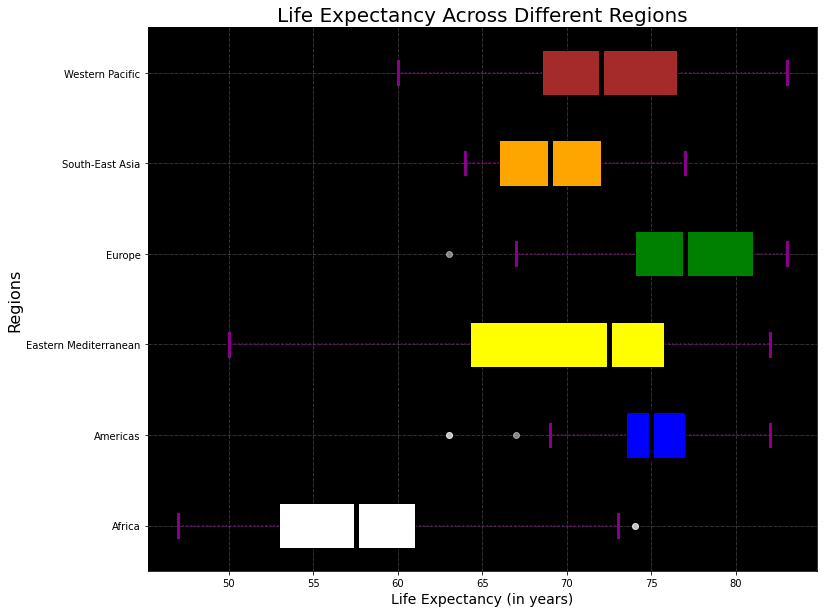

In [19]:
data_life_rate = data[['Region', 'Country','LifeExpectancy']]

data_life_rate_africa = data_life_rate[data_life_rate['Region'] == 'Africa']
data_life_rate_americas = data_life_rate[data_life_rate['Region'] == 'Americas']
data_life_rate_mediterranean = data_life_rate[data_life_rate['Region'] == 'Eastern Mediterranean']
data_life_rate_europe = data_life_rate[data_life_rate['Region'] == 'Europe']
data_life_rate_asia = data_life_rate[data_life_rate['Region'] == 'South-East Asia']
data_life_rate_pacific = data_life_rate[data_life_rate['Region'] == 'Western Pacific']



fig = plt.figure(figsize =(12, 10))
ax = fig.add_subplot(111)
ax.set_facecolor('Black')
bp = plt.boxplot([data_life_rate_africa['LifeExpectancy'], 
             data_life_rate_americas['LifeExpectancy'], 
             data_life_rate_mediterranean['LifeExpectancy'], 
             data_life_rate_europe['LifeExpectancy'], 
             data_life_rate_asia['LifeExpectancy'], 
             data_life_rate_pacific['LifeExpectancy']], 
             patch_artist= True,
             vert = 0)
colors = ['white', 'blue',
          'yellow', 'green',
          'orange', 'brown']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for whisker in bp['whiskers']:            #Whiskers
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
for cap in bp['caps']:                     #Range
    cap.set(color ='#8B008B',
            linewidth = 3)
for median in bp['medians']:               #Median
    median.set(color ='black',
               linewidth = 5)
for flier in bp['fliers']:                 #Outliers 
    flier.set(
              markerfacecolor ='white',
              markeredgecolor = 'white',
              alpha = 0.5)
ax.set_yticklabels(['Africa', 'Americas', 
                    'Eastern Mediterranean', 'Europe',
                   'South-East Asia', 'Western Pacific'])
ax.grid(b = True, color ='white',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.4)

plt.xlabel("Life Expectancy (in years)", size=14)
plt.ylabel("Regions", size=16)
plt.title("Life Expectancy Across Different Regions", size=20)
plt.show(bp)

The above graph shows us the different life expectancy rates among the different regions. We can conclude from observing the graph that countries in Africa tend to have a lower life expectancy rate than countries in other regions. The median life expectancy in the region of Africa is about 57.5, when compared to other regions like the Americas, Eastern Mediterranean, Europe, South-East Asia and the Western Pacific, with median life expectancy rates of 75, 72.5, 77, 69 and 72 respectively. We can also observe that Europe has the highest life expectancy rates among the regions, and the Eastern Mediterranean has the most spread out life expectancy rates among the countries within its region.

# How is life expectancy related to wealth across different regions? How is wealth related to fertility across different regions? Do these relationships hold for African countries?

# Life Expectancy versus Wealth across different regions

In [18]:
wealth_life_expectancy = data[['Country','Region', 'GNI', 'LifeExpectancy']]
wealth_life_expectancy[['Region', 'GNI','LifeExpectancy']].groupby('Region')[['GNI', 'LifeExpectancy']].mean().round(2).sort_values(by=['GNI'])

,GNI,LifeExpectancy
Region,,
Africa,3971.09,57.96
South-East Asia,4836.36,69.36
Western Pacific,10184.44,72.33
Eastern Mediterranean,12040.00,69.59
Americas,12308.86,74.34
Europe,23206.13,76.74


<Figure size 864x720 with 0 Axes>

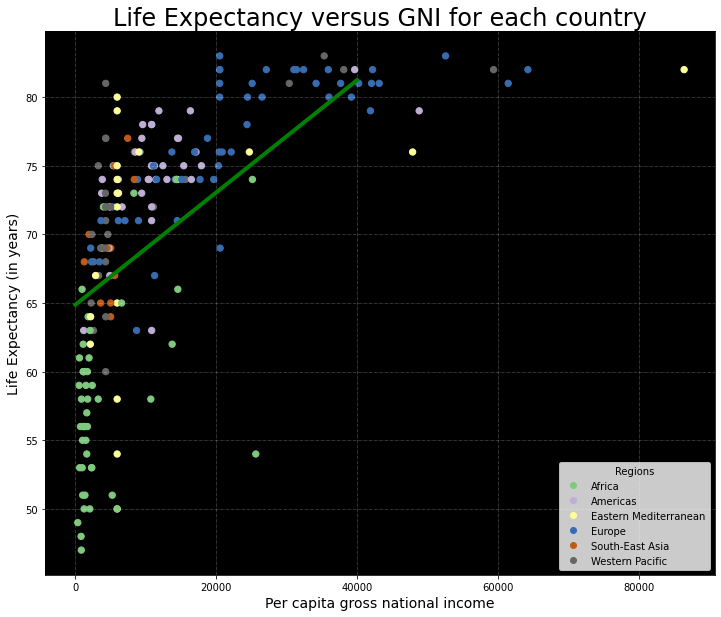

In [19]:
plt.figure(figsize=(12,10))
fig, ax = plt.subplots(figsize=(12,10))

names = ['Africa', 'Americas', 'Eastern Mediterranean', 'Europe', 'South-East Asia', 'Western Pacific']
ax.scatter = plt.scatter(
            wealth_life_expectancy.GNI,
            wealth_life_expectancy.LifeExpectancy,
            s=40,
            c = wealth_life_expectancy.Region.astype("category").cat.codes,
            cmap = "Accent")
ax.grid(b = True, color ='white',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.4)

linear_model = np.polyfit(wealth_life_expectancy.GNI, wealth_life_expectancy.LifeExpectancy, 1)
linear_model_fit = np.poly1d(linear_model)
linear_range = np.arange(0,40000)
plt.plot(linear_range, linear_model_fit(linear_range), color='green', linewidth=4)

ax.set_facecolor('Black')
plt.ylabel('Life Expectancy (in years)', size = 14)
plt.xlabel('Per capita gross national income', size = 14)
plt.legend(handles=ax.scatter.legend_elements()[0],
           labels = names,
           title="Regions")
plt.title('Life Expectancy versus GNI for each country', size=24)
plt.show()


In [20]:
wealth_life_expectancy[['LifeExpectancy', 'GNI']].corr()

,LifeExpectancy,GNI
LifeExpectancy,1.000000,0.626069
GNI,0.626069,1.000000


There is a positive correlation of 0.626 between Life expectancy and per capita gross national income, as shown in the table and graph above, that means that as one value increase, so does the other. 

<Figure size 864x720 with 0 Axes>

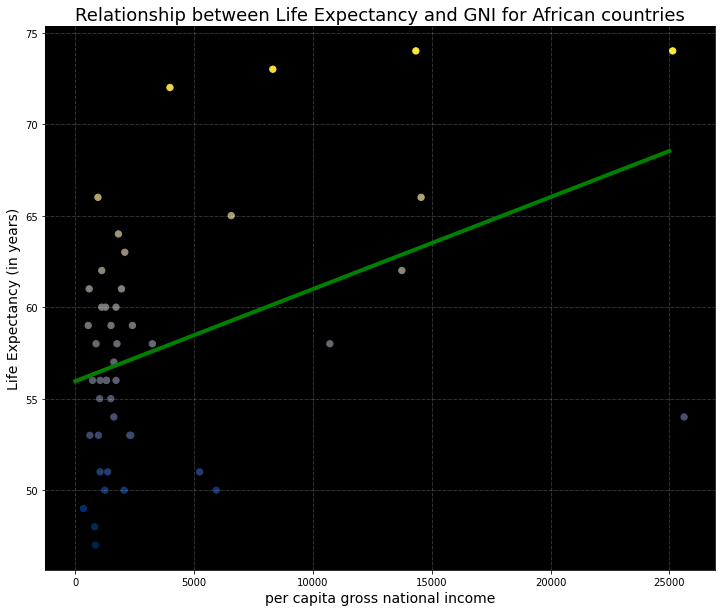

In [21]:
wealth_life_expectancy_africa = wealth_life_expectancy[wealth_life_expectancy['Region'] == 'Africa']
plt.figure(figsize=(12,10))
fig, ax = plt.subplots(figsize=(12,10))

ax.scatter = plt.scatter(wealth_life_expectancy_africa.GNI,
                         wealth_life_expectancy_africa.LifeExpectancy,
                         s=40,
                         c= wealth_life_expectancy_africa.LifeExpectancy,
                         cmap="cividis"
                        )
ax.grid(b = True, color ='white',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.4)

linear_model = np.polyfit(wealth_life_expectancy_africa.GNI, wealth_life_expectancy_africa.LifeExpectancy, 1)
linear_model_fit = np.poly1d(linear_model)
linear_range = np.arange(0,25000)
plt.plot(linear_range, linear_model_fit(linear_range), color='green', linewidth=4)

ax.set_facecolor('Black')
plt.xlabel('per capita gross national income', size = 14)
plt.ylabel('Life Expectancy (in years)', size = 14)
plt.title('Relationship between Life Expectancy and GNI for African countries', size=18)
plt.show()

In [22]:
wealth_life_expectancy_africa[['LifeExpectancy', 'GNI']].corr()

,LifeExpectancy,GNI
LifeExpectancy,1.000000,0.438103
GNI,0.438103,1.000000


The above graph and table show the correlation between life expectancy and per capita gross national income, as we can see, these two variable have a positive correlation with eachother, so as one increases, so does the other. However, this relationship is much weaker when compared to the correlation between life expectancy and per capita gross national income for all countries and regions.

# Wealth vs Fertility Rate for different regions

In [23]:
wealth_fertility = data[['Country','Region', 'GNI', 'FertilityRate']]
wealth_fertility[['Region', 'GNI','FertilityRate']].groupby('Region')[['GNI', 'FertilityRate']].mean().round(2)

,GNI,FertilityRate
Region,,
Africa,3971.09,4.72
Americas,12308.86,2.34
Eastern Mediterranean,12040.00,3.24
Europe,23206.13,1.75
South-East Asia,4836.36,2.56
Western Pacific,10184.44,2.65


<Figure size 864x720 with 0 Axes>

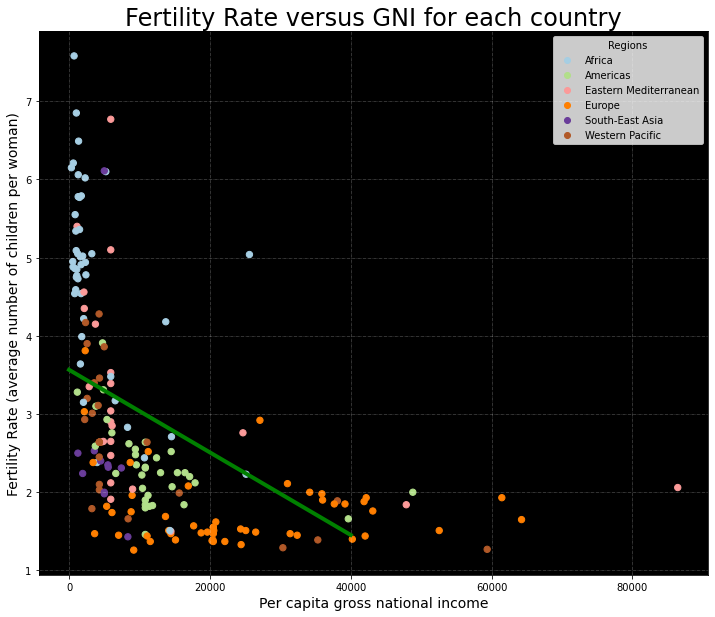

In [24]:
plt.figure(figsize=(12,10))
fig, ax = plt.subplots(figsize=(12,10))

names = ['Africa', 'Americas', 'Eastern Mediterranean', 'Europe', 'South-East Asia', 'Western Pacific']
ax.scatter = plt.scatter(wealth_fertility.GNI,
            wealth_fertility.FertilityRate,
            s=40,
            c = wealth_life_expectancy.Region.astype("category").cat.codes,
            cmap = "Paired")
ax.set_facecolor('Black')

ax.grid(b = True, color ='white',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.4)

linear_model = np.polyfit(wealth_fertility.GNI, wealth_fertility.FertilityRate, 1)
linear_model_fit = np.poly1d(linear_model)
linear_range = np.arange(0,40000)
plt.plot(linear_range, linear_model_fit(linear_range), color='green', linewidth=4)

plt.xlabel('Per capita gross national income', size = 14)
plt.ylabel('Fertility Rate (average number of children per woman)', size = 14)
plt.legend(handles=ax.scatter.legend_elements()[0],
           labels = names,
           title="Regions")
plt.title('Fertility Rate versus GNI for each country', size=24)
plt.show()

In [25]:
wealth_fertility[['FertilityRate', 'GNI']].corr()

,FertilityRate,GNI
FertilityRate,1.000000,-0.515835
GNI,-0.515835,1.000000


Fertility rate and per capita gross national income have a negative correlation of -0.515, as shown in the table and graph above, this means that as when one value increase, the other decreases

<Figure size 864x720 with 0 Axes>

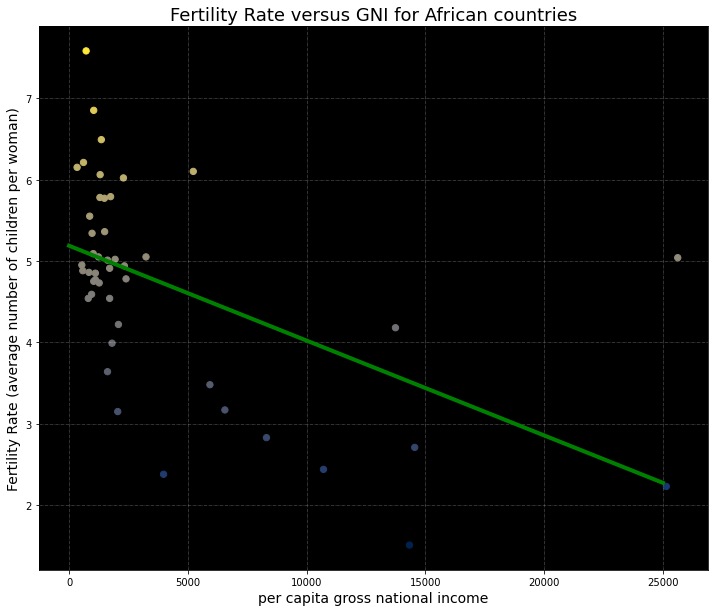

In [26]:
wealth_fertility_africa = wealth_fertility[wealth_fertility['Region'] == 'Africa']
plt.figure(figsize=(12,10))
fig, ax = plt.subplots(figsize=(12,10))

ax.scatter = plt.scatter(wealth_fertility_africa.GNI,
                         wealth_fertility_africa.FertilityRate,
                         s=40,
                         c= wealth_fertility_africa.FertilityRate,
                         cmap="cividis"
                        )
ax.grid(b = True, color ='white',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.4)

linear_model = np.polyfit(wealth_fertility_africa.GNI, wealth_fertility_africa.FertilityRate, 1)
linear_model_fit = np.poly1d(linear_model)
linear_range = np.arange(0,25000)
plt.plot(linear_range, linear_model_fit(linear_range), color='green', linewidth=4)

ax.set_facecolor('Black')
plt.xlabel('per capita gross national income', size = 14)
plt.ylabel('Fertility Rate (average number of children per woman)', size = 14)
plt.title('Fertility Rate versus GNI for African countries', size=18)
plt.show()

In [27]:
wealth_fertility_africa[['FertilityRate', 'GNI']].corr()

,FertilityRate,GNI
FertilityRate,1.000000,-0.531564
GNI,-0.531564,1.000000


As we can see in the table and graph above, per capita gross national income (GNI) and fertility rate, have a negative correlation of -0.531 for African countries. This is very close to the negative relationship we had when comparing all countries, with that correlation being -0.515. A negative correlation means that when one of the two values increases, the other decreases.

# Create appropriate graphs to visually represent the relationship between literacy and life expectancy by Region, and then for African countries. What can be concluded from the graphs? How confident can we be in the relationships represented here?

# Literacy Rate vs Life Expectancy

In [28]:
literacy_life = data[['Country','Region','LiteracyRate', 'LifeExpectancy']]
literacy_life[['Region', 'LiteracyRate','LifeExpectancy']].groupby('Region')[['LiteracyRate', 'LifeExpectancy']].mean().round(2).sort_values(by=['LiteracyRate'])

,LiteracyRate,LifeExpectancy
Region,,
South-East Asia,65.52,69.36
Africa,69.42,57.96
Eastern Mediterranean,83.87,69.59
Western Pacific,92.91,72.33
Americas,93.19,74.34
Europe,98.99,76.74


<Figure size 864x720 with 0 Axes>

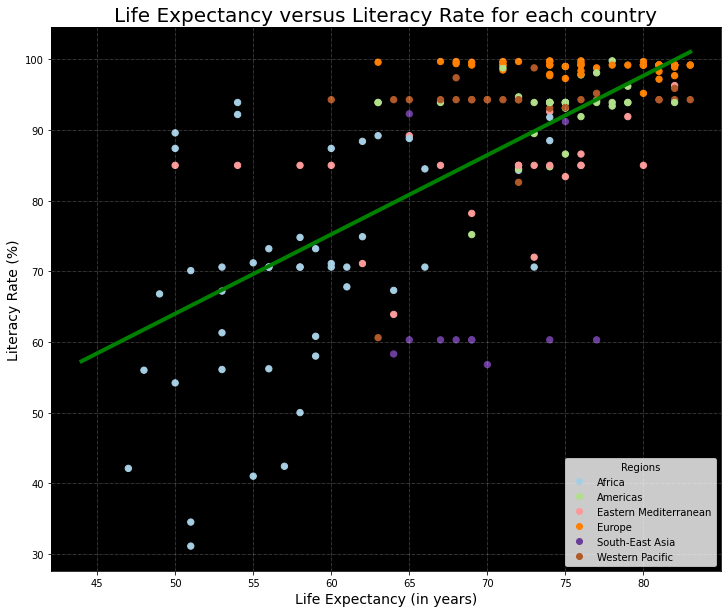

In [29]:
plt.figure(figsize=(12,10))
fig, ax = plt.subplots(figsize=(12,10))

names = ['Africa', 'Americas', 'Eastern Mediterranean', 'Europe', 'South-East Asia', 'Western Pacific']
ax.scatter = plt.scatter(literacy_life.LifeExpectancy,
                         literacy_life.LiteracyRate,
            s=40,
            c = wealth_life_expectancy.Region.astype("category").cat.codes,
            cmap = "Paired")
ax.set_facecolor('Black')

ax.grid(b = True, color ='white',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.4)

linear_model = np.polyfit(literacy_life.LifeExpectancy, literacy_life.LiteracyRate, 1)
linear_model_fit = np.poly1d(linear_model)
linear_range = np.arange(44,84)
plt.plot(linear_range, linear_model_fit(linear_range), color='green', linewidth=4)

plt.xlabel('Life Expectancy (in years)', size = 14)
plt.ylabel('Literacy Rate (%)', size = 14)
plt.legend(handles=ax.scatter.legend_elements()[0],
           labels = names,
           title="Regions")
plt.title('Life Expectancy versus Literacy Rate for each country', size=20)
plt.show()

In [30]:
literacy_life[['LiteracyRate', 'LifeExpectancy']].corr()

,LiteracyRate,LifeExpectancy
LiteracyRate,1.000000,0.678999
LifeExpectancy,0.678999,1.000000


Literacy rate and life expectancy have a positive correlation of 0.678, as shown in the graph and table above, this means that as one of them increases, so does the other.

The above graph shows the relationship between literacy rate and life expectancy for all regions, this relationship is very weak but shows a slight life expectancy as literacy rates increase.

# Literacy Rate vs Life Expectancy in Africa

<Figure size 864x720 with 0 Axes>

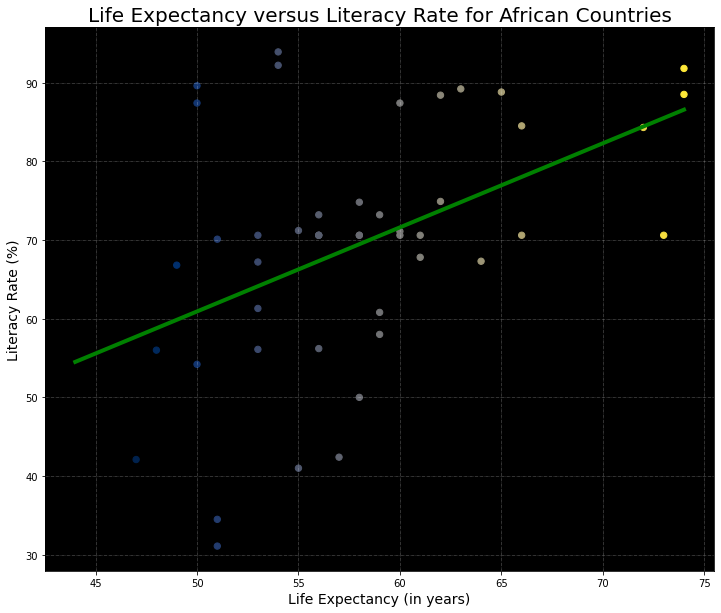

In [31]:
literacy_life_africa = literacy_life[literacy_life['Region'] == 'Africa']
plt.figure(figsize=(12,10))
fig, ax = plt.subplots(figsize=(12,10))

ax.scatter = plt.scatter(literacy_life_africa.LifeExpectancy,
                         literacy_life_africa.LiteracyRate,
                         s=40,
                         c= literacy_life_africa.LifeExpectancy,
                         cmap="cividis"
                        )

ax.grid(b = True, color ='white',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.4)

linear_model = np.polyfit(literacy_life_africa.LifeExpectancy, literacy_life_africa.LiteracyRate, 1)
linear_model_fit = np.poly1d(linear_model)
linear_range = np.arange(44,75)
plt.plot(linear_range, linear_model_fit(linear_range), color='green', linewidth=4)

ax.set_facecolor('Black')
plt.xlabel('Life Expectancy (in years)', size = 14)
plt.ylabel('Literacy Rate (%)', size = 14)
plt.title('Life Expectancy versus Literacy Rate for African Countries', size=20)
plt.show()

In [32]:
literacy_life_africa[['LiteracyRate', 'LifeExpectancy']].corr()

,LiteracyRate,LifeExpectancy
LiteracyRate,1.000000,0.458439
LifeExpectancy,0.458439,1.000000


Literacy rate and life expectancy still have a positive correlation for countries in the African region. This is much weaker, as it is 0.458 whereas the correlation between literacy rate and life expectancy for all countries was 0.678. This means that when one value increases, so does the other, but not as much as when compared to all countries overall.

The above graph shows the relationship between life expectancy (in years) and literacy rate (%) for only countries in the reigion of Africa, as the graph shows, there is a positive correlation between these two variables for African countries. Although it is not as strong as the realtionship between these two variables across all countries. The relationship betwen life expectancy and literacy rate is that countries with high life expectancy, tend to also have higher literacy rates.

<Figure size 864x720 with 0 Axes>

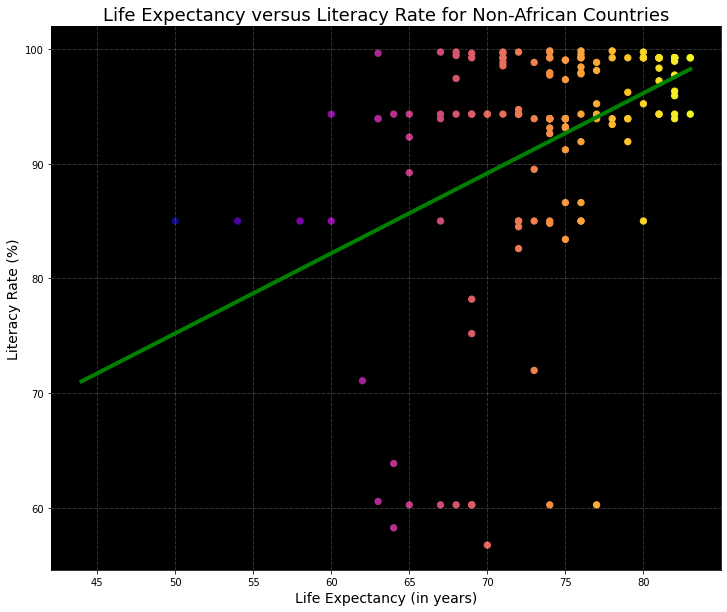

In [33]:
literacy_life_non_africa = literacy_life[literacy_life['Region'] != 'Africa']
plt.figure(figsize=(12,10))
fig, ax = plt.subplots(figsize=(12,10))

ax.scatter = plt.scatter(literacy_life_non_africa.LifeExpectancy,
                         literacy_life_non_africa.LiteracyRate,
                         s=40,
                         c=literacy_life_non_africa.LifeExpectancy,
                         cmap="plasma"
                        )

ax.grid(b = True, color ='white',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.4)

linear_model = np.polyfit(literacy_life_non_africa.LifeExpectancy, literacy_life_non_africa.LiteracyRate, 1)
linear_model_fit = np.poly1d(linear_model)
linear_range = np.arange(44,84)
plt.plot(linear_range, linear_model_fit(linear_range), color='green', linewidth=4)

ax.set_facecolor('Black')
plt.xlabel('Life Expectancy (in years)', size = 14)
plt.ylabel('Literacy Rate (%)', size = 14)
plt.title('Life Expectancy versus Literacy Rate for Non-African Countries', size=18)
plt.show()

In [34]:
literacy_life_non_africa[['LiteracyRate', 'LifeExpectancy']].corr()

,LiteracyRate,LifeExpectancy
LiteracyRate,1.000000,0.409629
LifeExpectancy,0.409629,1.000000


When looking at the correlation between literacy rate and life expectancy of countries not in Africa, we can see that we get a correlation of 0.409, which is less than the correlation for all countries (0.678). The correlation for only African countries (0.458). This would lead us to conclude that even though countries in Africa have a lower positive correlation between these values, they still have higher correlation then other regions. A positive correlation between two variables means that as one value increases, so does the other.

The above two graphs show the relationship between literacy rate and life expectancy for countries in the region of africa and the ones outside. Both graphs show that the relationship between the two is very weak, and even weaker for African countries. The relationship is as literacy rates increase, so does life expectancy, but the relationship is so weak that it is barely non existent and even weaker for african countries.

# 3. Conclusion and insights 

 The are numerours rows and columns with missing values, we used the region to group the data together and filled in missing data with the median of that group.

 Two columns had different data types than the rest of the numerical columns, so we changed them

 The country the the lowest % of population under 15 was Japan with 13.12% of their population under the age of 15 and the country with the highest % of population under 15 was Niger with 49.99% of their population

 The region with the highest % of their population over 60 was Europe with an average of 19.77% of the countries in the region having a population over 60. 

 Fertility does seem to decrease as income increases, as shown in a scatter plot in our analysis, however, there are countries like Equatorial Guinea who do not seem to follow this pattern. This is because the two values have a negative correlation with eachother, meaning that when one increases, the other decreases.

 South-East Asia and Africa are the regions with the lowest literacy rates

 Europe and the Americas have the lowest child mortality rates.

 The most valuable piece of information that I obtained from creating a box and whiskers plot with the average life expectancy across all different regions was that Africa is an outlier amongst the regions with an extremely low life expectancy when compared to the other regions

 Life expectancy and per capita gross national income have a positive correlation. Meaning that when one of the values increases, so does the other, this is true when we compare all regions. When we compare countries in Africa, the relationship between life expectancy and gni is still positive. It is not as strong as when we calculate for all countries in all regions. Fertility rate and per capita gross national income for all regions have a negative correlation, meaning that as one of the two increases, the other decreases, this is also true for countries in the African region.

 Literacy rate and life expectancy have a positive correlation in this dataset, this means that as one increases, so does the other. When examining all regions together, the correlation is 0.678, which is a strong positive correlation, when we look further and look at this relationship for only African countries, it decreases to 0.458. Which means that it has a weaker positive relationship when compared to all regions. However, when we look at the same correlation for non-African countries, the relationship becomes even weaker, at 0.409. This means that there is a positive correlation between literacy rate and life expectancy. The African regions relationship between these variables is weaker then the overall relationship, but the African region does not have the weakest relationship of the regions for the correlation between literacy rate and life expectancy.